In [198]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#load iris 
from sklearn import datasets

In [199]:
iris_dataset = datasets.load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
#simplyfiying the column names
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
#display the first 10 rows
iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


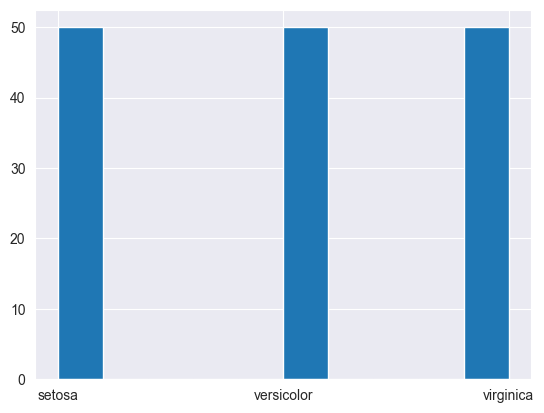

In [200]:
iris["species"].hist()
iris.describe()

<Axes: >

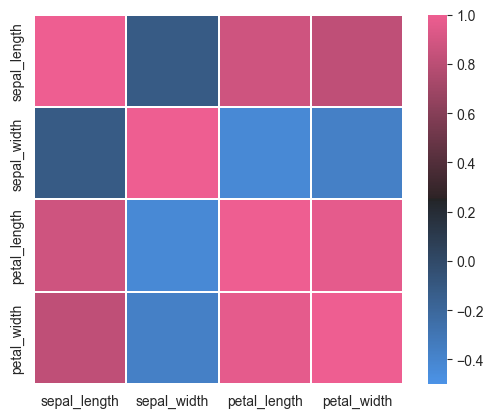

In [201]:
corr = iris.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [202]:
#since the correlation between petal length and petal width is 0.96, we can drop one of them
#we will drop petal width
# iris.drop("petal_width", axis=1, inplace=True)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

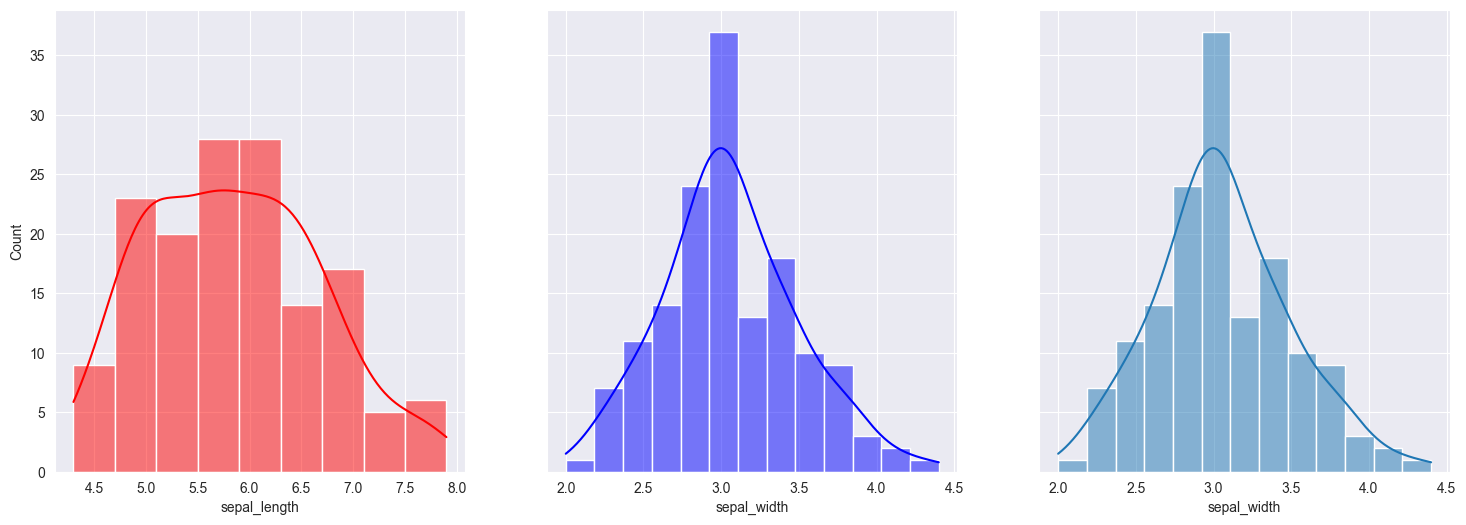

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(iris, ax=axes[0], x="sepal_length", kde=True, color='r')
sns.histplot(iris, ax=axes[1], x="sepal_width", kde=True, color='b')
sns.histplot(iris, ax=axes[2], x="sepal_width", kde=True)


## Convert continuous features to Categorical features

In [211]:
#convert to categorical
iris["species"] = iris["species"].astype('category')
iris["species"] = iris["species"].cat.codes
iris.head(100)



#convert the sepal length to categorical
iris["sepal_length"] = pd.cut(iris["sepal_length"], bins=[4,5,6,7,8], labels=[1,2,3,4])
iris["sepal_length"] = iris["sepal_length"].astype('category')
iris["sepal_length"] = iris["sepal_length"].cat.codes

#convert the sepal width to categorical
iris["sepal_width"] = pd.cut(iris["sepal_width"], bins=[2,3,4,5,6], labels=[1,2,3,4])
iris["sepal_width"] = iris["sepal_width"].astype('category')
iris["sepal_width"] = iris["sepal_width"].cat.codes

#convert the petal length to categorical
iris["petal_length"] = pd.cut(iris["petal_length"], bins=[1,2,3,4,5,6,7], labels=[1,2,3,4,5,6])
iris["petal_length"] = iris["petal_length"].astype('category')
iris["petal_length"] = iris["petal_length"].cat.codes

#convert the petal width to categorical
iris["petal_width"] = pd.cut(iris["petal_width"], bins=[0,0.5,1,1.5,2,2.5], labels=[1,2,3,4,5])
iris["petal_width"] = iris["petal_width"].astype('category')
iris["petal_width"] = iris["petal_width"].cat.codes

iris.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,1,1,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
95,1,0,3,2,1
96,1,0,3,2,1
97,2,0,3,2,1
98,1,0,1,2,1


In [212]:

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.variance = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.variance = np.zeros((len(self.classes), X.shape[1]))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[idx] = len(X_c) / len(X)
            self.mean[idx] = np.mean(X_c, axis=0)
            self.variance[idx] = np.var(X_c, axis=0)

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for idx, c in enumerate(self.classes):
                prior = np.log(self.class_priors[idx])
                likelihood = np.sum(np.log(self._pdf(idx, x)))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.variance[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [213]:
gaussian_nb = NaiveBayesClassifier()
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [214]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [208]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [209]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [215]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="species")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='micro'))

[[9 0 0]
 [0 8 3]
 [0 1 9]]
0.8666666666666667


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

def k_fold_cross_validation(classifier, X, y, k=10):
    n_samples = len(X)
    fold_size = n_samples // k
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    results = []

    for i in range(k):
        start = i * fold_size
        end = min((i + 1) * fold_size, n_samples)
        test_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Compute evaluation metrics
        correct_classified = np.sum(y_pred == y_test)
        incorrect_classified = np.sum(y_pred != y_test)
        mse = np.mean((y_pred - y_test) ** 2)
        rmse = np.sqrt(mse)
        ae = np.mean(np.abs(y_pred - y_test))
        cm = confusion_matrix(y_test, y_pred)
        tp = cm[1, 1] / np.sum(cm[1, :])
        fp = cm[0, 1] / np.sum(cm[0, :])
        total = np.sum(cm)
        p0 = (cm[0, 0] + cm[1, 1]) / total
        pc = ((np.sum(cm[0, :]) * np.sum(cm[:, 0])) + (np.sum(cm[1, :]) * np.sum(cm[:, 1]))) / (total ** 2)
        kappa = (p0 - pc) / (1 - pc)

        # Store results
        results.append({
            "Fold": i+1,
            "Correctly Classified": correct_classified,
            "Incorrectly Classified": incorrect_classified,
            "Root Mean Squared Error": rmse,
            "Relative Absolute Error": ae,
            "True Positive Rate": tp,
            "False Positive Rate": fp,
            "Confusion Matrix": cm,
            "Kappa Score": kappa
        })

    # Print results as pretty table
    headers = ["Fold", "Correctly Classified", "Incorrectly Classified", 
               "Root Mean Squared Error", "Relative Absolute Error", 
               "True Positive Rate", "False Positive Rate", "Confusion Matrix", "Kappa Score"]
    table = [[r["Fold"], r["Correctly Classified"], r["Incorrectly Classified"], 
              r["Root Mean Squared Error"], r["Relative Absolute Error"], 
              r["True Positive Rate"], r["False Positive Rate"], r["Confusion Matrix"], r["Kappa Score"]] for r in results]
    print(tabulate(table, headers=headers))

    # Compute average evaluation metrics across all folds
    avg_correct_classified = np.mean([r["Correctly Classified"] for r in results])
    avg_incorrect_classified = np.mean([r["Incorrectly Classified"] for r in results])
    avg_rmse = np.mean([r["Root Mean Squared Error"] for r in results])
    avg_rae = np.mean([r["Relative Absolute Error"] for r in results])
    avg_tpr = np.mean([r["True Positive Rate"] for r in results])
    avg_fpr = np.mean([r["False Positive Rate"] for r in results])
    avg_kappa = np.mean([r["Kappa Score"] for r in results])

    # Print average evaluation metrics across all folds
    print("\nAverage Evaluation Metrics Across All Folds:")
    print(f"Average Correctly Classified Instances: {avg_correct_classified}")
    print(f"Average Incorrectly Classified Instances: {avg_incorrect_classified}")
    print(f"Average Root Mean Squared Error: {avg_rmse}")
    print(f"Average Relative Absolute Error: {avg_rae}")
    print(f"Average True Positive Rate: {avg_tpr}")
    print(f"Average False Positive Rate: {avg_fpr}")
    print(f"Average Kappa Score: {avg_kappa}")


In [ ]:
# Perform k-fold cross-validation
k_fold_cross_validation(gaussian_nb, X, y, k=10)

  Fold    Correctly Classified    Incorrectly Classified    Root Mean Squared Error    Relative Absolute Error    True Positive Rate    False Positive Rate  Confusion Matrix      Kappa Score
------  ----------------------  ------------------------  -------------------------  -------------------------  --------------------  ---------------------  ------------------  -------------
     1                      13                         2                   0.365148                  0.133333               0.833333                      0  [[3 0 0]                 0.416667
                                                                                                                                                              [0 5 1]
                                                                                                                                                              [0 1 5]]
     2                      13                         2                   0.365148           

C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:35: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:35: RuntimeWarning: divide by zero encountered in divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:37: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:35: RuntimeWarning: divide by zero encountered in divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:37: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:35: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * 

In [ ]:
# Load HEART Dataset
heart_train = pd.read_csv("heart.csv")
heart_test = pd.read_csv("heart_test.csv")
heart_test.head()
heart_train.head()

,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,0.500000,0.362500,0.162500,0.262500,0.212500,0.300000,0.125000,0.262500,0.275000,0.187500,...,0.350000,0.200000,0.075000,0.175000,0.100000,0.075000,0.187500,0.225000,0.237500,0.32500
std,0.503155,0.483755,0.371236,0.442769,0.411658,0.461149,0.332805,0.442769,0.449331,0.392775,...,0.479979,0.402524,0.265053,0.382364,0.301893,0.265053,0.392775,0.420217,0.428236,0.47133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


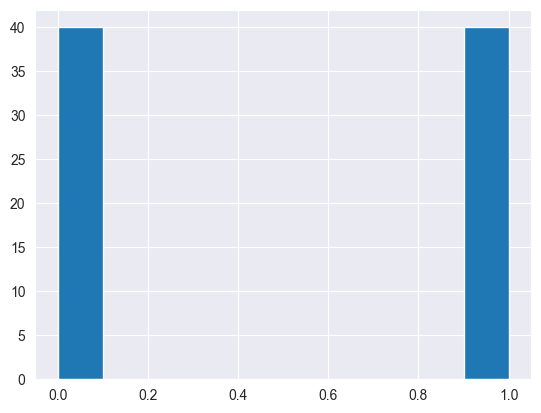

In [ ]:
#rename OVERALL_DIAGNOSIS to diagnosis
heart_train["OVERALL_DIAGNOSIS"].hist()
heart_train.describe()

In [ ]:
# test the naive bayes classifier
# X = iris.iloc[:, :-1].values
# y = iris.iloc[:, -1].values
# gaussian_nb.fit(X, y)
# y_pred = gaussian_nb.predict(X)
# accuracy = np.mean(y_pred == y)
# print(f"Accuracy: {accuracy:.2f}")

X = heart_train.iloc[:, :-1].values
y = heart_train.iloc[:, -1].values
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.68


C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:35: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:35: RuntimeWarning: divide by zero encountered in divide
  numerator = np.exp(-((x - mean) ** 2) / (2 * var))
C:\Users\shubham\AppData\Local\Temp\ipykernel_20472\473133253.py:37: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator
